# Actuator in Ferrite

## Import Packages

In [1]:
using Ferrite
using FerriteGmsh
using SparseArrays
using LinearAlgebra 
using WriteVTK
using Plots 

### Read Mesh and Perform Elementary Checks 

In [4]:
meshfile = "actuator.msh"
grid = togrid(meshfile)

Info    : Reading 'actuator.msh'...
Info    : 144 entities
Info    : 18637 nodes
Info    : 35782 elements
Info    : Done reading 'actuator.msh'


Grid{2, Triangle, Float64} with 35282 Triangle cells and 18637 nodes

In [5]:
# what is the mesh size?  
dh = DofHandler(grid)
ip = Lagrange{RefTriangle, 1}()
add!(dh, :u, ip)
close!(dh)
K = allocate_matrix(dh)

18637×18637 SparseMatrixCSC{Float64, Int64} with 126463 stored entries:
⎡⠿⣧⣤⣤⣤⣤⣤⣄⡤⣤⡀⣤⣤⣤⣠⣄⣤⣤⣤⣤⡤⣠⣤⣤⡄⣤⣤⣤⣤⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⣹⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⠻⠿⢿⣿⣿⣿⣿⣿⣷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢀⢣⢵⣿⣿⣻⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣬⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠀⠀⡀⠊⢻⣿⣿⣿⣿⡗⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⠄⠀⠠⠀⠰⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⢾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡖⠀⠠⠀⢀⣿⣿⣿⣿⡗⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠈⡡⠅⢽⣿⣿⣿⣿⡿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣸⣽⡓⣽⣿⣿⣿⣿⡧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣫⣿⣿⣟⣣⣿⡛⠛⢛⠀⠀⠀⠁⠘⠉⡉⠉⣛⣻⣿⣿⣿⣿⡟⠃⠈⠀⢙⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣇⢍⣖⡠⠈⠀⠂⠀⠂⠅⠎⢷⠻⣿⣿⣿⣿⡿⠆⠀⠀⢹⡗⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣭⣿⣿⣿⣿⣿⣿⣿⣿⣿⣶⣴⣦⣤⣴⣷⣷⣷⣿⠿⠉⠻⠏⢻⣶⣶⣦⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠂⠀⠀⠀⠸⣿⣿⣿⣿⡯⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠿⠿⣿⣿⣿⢿⣿⠿⠿⢿⠿⠿⢿⢿⠿⣿⡿⠿⡿⡷⠴⢷⠶⠿⠿⡿⡿⢿⣷⣀⣀⣀⣀⣀⡀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⣿⣻⡇⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⠿⠿⠿⠾⠿⣧⡄⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠿⣧⡄⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⢻⣶⎦

### Form Array of Boundary Nodes 

In [30]:
?apply!

search: apply! axpby! axpy! apply_rhs! append! apply_zero! all! spy!



```julia
apply!(K::SparseMatrixCSC, rhs::AbstractVector, ch::ConstraintHandler)
```

Adjust the matrix `K` and right hand side `rhs` to account for the Dirichlet boundary conditions specified in `ch` such that `K \ rhs` gives the expected solution.

!!! note
    `apply!(K, rhs, ch)` essentially calculates

    ```julia
    rhs[free] = rhs[free] - K[constrained, constrained] * a[constrained]
    ```

    where `a[constrained]` are the inhomogeneities. Consequently, the sign of `rhs` matters (in contrast with `apply_zero!`).


```julia
apply!(v::AbstractVector, ch::ConstraintHandler)
```

Apply Dirichlet boundary conditions and affine constraints, specified in `ch`, to the solution vector `v`.

# Examples

```julia
K, f = assemble_system(...) # Assemble system
apply!(K, f, ch)            # Adjust K and f to account for boundary conditions
u = K \ f                   # Solve the system, u should be "approximately correct"
apply!(u, ch)               # Explicitly make sure bcs are correct
```

!!! note
    The last operation is not strictly necessary since the boundary conditions should already be fulfilled after `apply!(K, f, ch)`. However, solvers of linear systems are not exact, and thus `apply!(u, ch)` can be used to make sure the boundary conditions are fulfilled exactly.



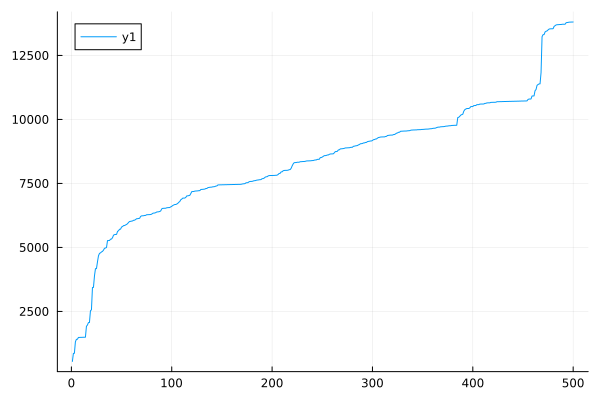

In [9]:
# are boundary nodes correctly identified? 
# is rhs-vector set to Dirichlet value on the boundary nodes? 
∂Ω = union(
    getfacetset(grid, "left"),
    getfacetset(grid, "right"),
    getfacetset(grid, "top"),
    getfacetset(grid, "bottom"),
);

dbc = Dirichlet(:u, ∂Ω, (x, t) -> 0)
ch  = ConstraintHandler(dh);
add!(ch, dbc);
close!(ch)

f = ones(ndofs(dh));

apply!(K, f, ch)

plot(f)

bnd_nodes = findall(f .== 0)

plot(bnd_nodes)

In [10]:
struct CellPartion
  magnetcs
  aircs
  corecs
  movercs
  left_coil_upcs
  left_coil_dwcs
  right_coil_upcs
  right_coil_dwcs
end

In [11]:
getfacetset(grid, "bottom")
getfacetset(grid, "right")
getfacetset(grid, "top")
getfacetset(grid, "bottom");

In [12]:
cellpartion = CellPartion(getcellset(grid, "magnet"), 
  getcellset(grid, "air"),
  getcellset(grid, "core"),
  getcellset(grid, "mover"),
  getcellset(grid, "left_coil_up"),
  getcellset(grid, "left_coil_dw"),
  getcellset(grid, "right_coil_up"),
  getcellset(grid, "right_coil_dw")
);

## Section 1: Introduction 

<b>Goal</b>: Solve actuator using Ferrite. 

<b>To do</b>:
1. use [PhysicalConstants.jl](https://github.com/JuliaPhysics/PhysicalConstants.jl) 

## Section 2: Test Case Description 

### Geometry

### Mesh 

### Physics 

The governing equations for stationary magnetic field are: 

$ \nabla \times \vec{H}(\vec{x}) = \vec{0}$ 

$ \nabla \cdot \vec{B}(\vec{x}) = 0 $

$\vec{B}(\vec{x}) = \mu_0 \, \vec{H}(\vec{x})$ (in air) 
and $\vec{B}(\vec{x}) = \mu_0 \, (1 + \chi_m) \, \vec{H}(\vec{x})$

<b>Differential Equation</b> 

<b>Boundary Conditions</b> 

As boundary condition on the scalar field $V_m(\vec{x})$ we impose that 
 
$$ A_z(\vec{x}) = 0 \text{ for } \vec{x} \in \partial \Omega $$. 

### Solver

Using [Ferrite](https://ferrite-fem.github.io/Ferrite.jl/stable/examples/heat_equation/).

### Post-Processing 

Compute the following quantities : 
1. the magnetic field $\vec{H} = \text{grad} [ u(\vec{x}) ]$ (the $x$, $y$, $z$ component and the magnitude) in the plate and air domain;
2. the magnetic flux $\vec{B} = \mu_0 \, \vec{H}$ (in air) and $\vec{B} = \mu_0 \, (1 + \chi_m) \, \vec{H}$; (as before)

## Section 4: 2D Mockup of the Magnetized Plate  

In [14]:
# define spatially varying diffusion coefficient 
function set_diff_coeff(cell,cellpartion)
    if cellid(cell) in cellpartion.magnetcs
        value = 1.0 
    elseif cellid(cell) in cellpartion.aircs
        value = 1.0 
    elseif cellid(cell) in cellpartion.corecs  
        value = 1.0 
    elseif cellid(cell) in cellpartion.movercs  
        value = 1.0 
    elseif cellid(cell) in cellpartion.left_coil_upcs
        value = 1.0
    elseif cellid(cell) in cellpartion.left_coil_dwcs
        value = 1.0  
    elseif cellid(cell) in cellpartion.right_coil_upcs
        value = 1.0
    elseif cellid(cell) in cellpartion.right_coil_dwcs
        value = 1.0       
    end 
    return value 
end 

# define spatially varying source term  
function set_source(cell, cellpartion)
    if cellid(cell) in cellpartion.magnetcs
        value = 0.0 
    elseif cellid(cell) in cellpartion.aircs
        value = 0.0 
    elseif cellid(cell) in cellpartion.corecs 
        value = 0.0 
    elseif cellid(cell) in cellpartion.movercs 
        value = 0.0 
    elseif cellid(cell) in cellpartion.left_coil_upcs
        value = 1.0
    elseif cellid(cell) in cellpartion.left_coil_dwcs
        value = -1.0  
    elseif cellid(cell) in cellpartion.right_coil_upcs
        value = 1.0
    elseif cellid(cell) in cellpartion.right_coil_dwcs
        value = -1.0       
    end 
    return value 
end 

# Ke: added spatially varying diffusion coefficient 
# fe: forces zero source term 
function assemble_element!(Ke::Matrix, fe::Vector, cellvalues::CellValues)
    n_basefuncs = getnbasefunctions(cellvalues)
    # Reset to 0
    fill!(Ke, 0)
    fill!(fe, 0)
    # Loop over quadrature points
    for q_point in 1:getnquadpoints(cellvalues)
        # Get the quadrature weight
        dΩ = getdetJdV(cellvalues, q_point)
        # Loop over test shape functions
        for i in 1:n_basefuncs
            δu  = shape_value(cellvalues, q_point, i)
            ∇δu = shape_gradient(cellvalues, q_point, i)
            # Add contribution to fe
            fe[i] += δu * dΩ
            # Loop over trial shape functions
            for j in 1:n_basefuncs
                ∇u = shape_gradient(cellvalues, q_point, j)
                # MODIFIED: Add contribution to Ke
                Ke[i, j] += (∇δu ⋅ ∇u) * dΩ
            end
        end
    end
    return Ke, fe
end

assemble_element! (generic function with 1 method)

In [15]:
function assemble_global(cellvalues::CellValues, K::SparseMatrixCSC, f::Vector, dh::DofHandler, cellpartion::CellPartion)
    # Allocate the element stiffness matrix and element force vector
    n_basefuncs = getnbasefunctions(cellvalues)
    Ke = zeros(n_basefuncs, n_basefuncs)
    fe = zeros(n_basefuncs)
    # Allocate global force vector f
    f = zeros(ndofs(dh))
    # Create an assembler
    assembler = start_assemble(K, f)
    # Loop over all cels
    for cell in CellIterator(dh)
        diff_coeff_val = set_diff_coeff(cell,cellpartion)
        source_val = set_source(cell,cellpartion)
        # Reinitialize cellvalues for this cell
        reinit!(cellvalues, cell)
        # Modified - Compute element contribution
        assemble_element!(Ke, fe, cellvalues)
        # Ke = diff_coeff_val * Ke 
        fe = source_val * fe 
        # Assemble Ke and fe into K and f
        assemble!(assembler, celldofs(cell), Ke, fe)
    end
    return K, f
end

assemble_global (generic function with 1 method)

In [16]:
dim = 2   # two spatial cartesian (x,y) dimensions 
order = 1 # linear interpolation
ip = Lagrange{RefTriangle, order}()
qr = QuadratureRule{RefTriangle}(2*order+1) # number of quadrature points
cellvalues = CellValues(qr, ip);

In [17]:
dh = DofHandler(grid)
add!(dh, :u, ip)
close!(dh);

In [18]:
K = allocate_matrix(dh);
f = zeros(ndofs(dh));

In [19]:
ch = ConstraintHandler(dh);

In [20]:
cellpartion = CellPartion(getcellset(grid, "magnet"), 
  getcellset(grid, "air"),
  getcellset(grid, "core"),
  getcellset(grid, "mover"),
  getcellset(grid, "left_coil_up"),
  getcellset(grid, "left_coil_dw"),
  getcellset(grid, "right_coil_up"),
  getcellset(grid, "right_coil_dw")
);

∂Ω = union(
    getfacetset(grid, "left"),
    getfacetset(grid, "right"),
    getfacetset(grid, "top"),
    getfacetset(grid, "bottom"),
);

In [21]:
dbc = Dirichlet(:u, ∂Ω, (x, t) -> 0)
add!(ch, dbc);
close!(ch)

ConstraintHandler:
  BCs:
    Field: u, Components: [1]

In [22]:
K = allocate_matrix(dh)

18637×18637 SparseMatrixCSC{Float64, Int64} with 126463 stored entries:
⎡⠿⣧⣤⣤⣤⣤⣤⣄⡤⣤⡀⣤⣤⣤⣠⣄⣤⣤⣤⣤⡤⣠⣤⣤⡄⣤⣤⣤⣤⡄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎤
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠿⣹⣿⣿⣿⣿⣿⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⢿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⠻⠿⢿⣿⣿⣿⣿⣿⣷⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣯⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⢀⢣⢵⣿⣿⣻⣿⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣬⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠀⠀⡀⠊⢻⣿⣿⣿⣿⡗⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣟⠄⠀⠠⠀⠰⣿⣿⣿⣿⣇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⢾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡖⠀⠠⠀⢀⣿⣿⣿⣿⡗⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠈⡡⠅⢽⣿⣿⣿⣿⡿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⣿⢿⣿⣿⣿⣿⣿⣿⣿⣸⣽⡓⣽⣿⣿⣿⣿⡧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣫⣿⣿⣟⣣⣿⡛⠛⢛⠀⠀⠀⠁⠘⠉⡉⠉⣛⣻⣿⣿⣿⣿⡟⠃⠈⠀⢙⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣇⢍⣖⡠⠈⠀⠂⠀⠂⠅⠎⢷⠻⣿⣿⣿⣿⡿⠆⠀⠀⢹⡗⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣭⣿⣿⣿⣿⣿⣿⣿⣿⣿⣶⣴⣦⣤⣴⣷⣷⣷⣿⠿⠉⠻⠏⢻⣶⣶⣦⣿⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⣿⣿⣿⣿⣿⣿⣿⣿⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠂⠀⠀⠀⠸⣿⣿⣿⣿⡯⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠿⠿⣿⣿⣿⢿⣿⠿⠿⢿⠿⠿⢿⢿⠿⣿⡿⠿⡿⡷⠴⢷⠶⠿⠿⡿⡿⢿⣷⣀⣀⣀⣀⣀⡀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⣿⣿⡇⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸⣿⣿⣿⣿⣻⡇⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⠿⠿⠿⠾⠿⣧⡄⠀⠀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠿⣧⡄⠀⎥
⎣⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⢻⣶⎦

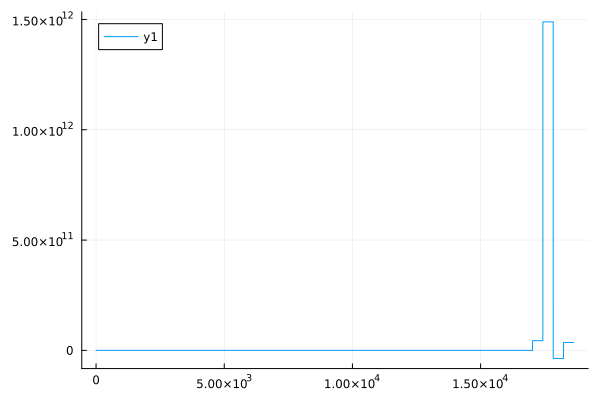

In [29]:
K, f = assemble_global(cellvalues, K, f, dh, cellpartion);
apply!(K, f, ch)
#f = ones(ndofs(dh));
u = K \ f;
plot(u)

In [27]:
f[bnd_nodes] .== 0 

500-element BitVector:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [28]:
K[bnd_nodes,bnd_nodes]

500×500 SparseMatrixCSC{Float64, Int64} with 1500 stored entries:
⎡⠑⢄⡀⠀⠀⠀⢀⢀⠀⠀⠀⠠⢨⠁⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⡀⠐⠐⠀⠤⠀⠀⠀⠀⠐⠀⠑⠈⠀⠐⠄⎤
⎢⠀⠈⢻⣶⢥⢠⡀⡔⢄⠄⠐⠀⠀⡀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠁⣓⠛⣤⠁⢠⠣⣓⡴⠯⠀⠐⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⠀⎥
⎢⠀⢐⢀⠬⠁⣀⣕⢝⠄⢘⠓⢖⠊⣠⠄⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠀⠀⠀⠕⢭⢢⣀⢁⠱⢆⡈⠃⠂⣉⢎⡇⡀⠀⠀⢀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠰⎥
⎢⠀⡀⠐⠀⡴⡏⢹⢄⠦⠈⡻⢎⠨⢑⠀⠄⣀⠀⢀⠀⠀⠀⠀⠀⠀⠄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⎥
⎢⠆⠒⠀⠠⢀⠀⠊⣠⡌⢠⢆⢂⠑⢄⠈⠀⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠕⣌⠇⎥
⎢⠀⠀⠀⠀⠠⠀⠠⠁⠮⠵⠀⠄⠂⠀⢵⢗⡚⡑⠣⢀⠀⠀⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⡨⎥
⎢⠀⠀⠀⠁⠀⠀⠀⠀⠀⠈⠀⠘⠀⠙⢞⠨⢵⢗⡠⡐⡠⠀⠄⡀⢀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠒⠉⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠐⠀⠀⠉⢂⢀⠪⡵⢏⡀⢒⠀⠃⠰⠄⠀⠂⠀⠀⠀⠀⠀⠠⠀⠠⡀⠠⠩⠄⎥
⎢⠀⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠊⢠⢈⢻⣶⣧⠰⠀⠉⠀⠀⠀⠀⢀⠐⠀⠐⠀⠀⠈⠀⡀⠀⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠀⠡⠤⠀⢉⡛⢟⣵⣄⡀⠀⠀⠀⠀⠀⠐⠀⠀⠀⠐⠀⠀⠈⠑⎥
⎢⢀⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠀⠀⠀⠠⡀⠐⠐⠆⡄⠀⠀⠹⡿⣯⡀⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠄⠔⎥
⎢⠐⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⠀⠀⠀⠀⠀⠀⠨⡿⣯⣯⠄⠀⠀⠀⠀⠀⠀⠀⠀⡀⡐⎥
⎢⠀⠃⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠋⠟⢻⣶⡄⠀⠀⠀⠀⠀⠀⠀⠐⡄⎥
⎢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠐⢀⠀⠀⠀⠀⠀⠀⠉⢻⣶⣊⡀⠀⠀⢦⠠⠠⠀⎥
⎢⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠊⠸⠿⣧⣆⡈⢌⢎⡁⠀⎥
⎢⢄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡀⠀⠀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡈⠹⠻⣦⠐⢊⠄⠀⎥
⎢⠂⠀⠀⠀⠀⠈⠀⠀⠀⠀⠀⠀⢄⠄⠀⠀⢠⠀⠀⡈⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⡓⡢⢕⡰⢀⣿⢟⠀⠀⎥
⎣⠐⠄⠀⠀⠀⠀⠀⠀⢀⡀⠀⠀⠦⠝⡀⡢⠃⠀⠃⠆⠀⠈⢆⠀⢀⠅⢀⠨⠐⠤⠀⠂⠁⠈⠀⠁⠀⠀⠑⢄⎦

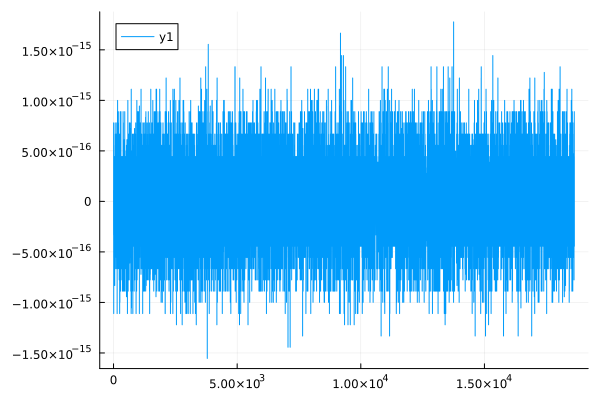

In [82]:
# prior to assembly matrix has row-sum equal zero 
K, f = assemble_global(cellvalues, K, f, dh, cellpartion)
v = ones(ndofs(dh))
w = K * v 
plot(w)

In [146]:
VTKGridFile("actuator", dh) do vtk
    write_solution(vtk, dh, f,"source")    
    write_solution(vtk, dh, u,"potential")
end

VTKGridFile for the closed file "actuator.vtu".

## Section 5: Computing Fluxes

In [ ]:
function compute_hfield(cellvalues::CellScalarValues{dim,T}, dh::DofHandler, a) where {dim,T}

    n = getnbasefunctions(cellvalues)
    cell_dofs = zeros(Int, n)
    nqp = getnquadpoints(cellvalues)

    # Allocate storage for the fluxes to store
    q = [Vec{2,T}[] for _ in 1:getncells(dh.grid)]

    for (cell_num, cell) in enumerate(CellIterator(dh))
        q_cell = q[cell_num]
        celldofs!(cell_dofs, dh, cell_num)
        aᵉ = a[cell_dofs]
        reinit!(cellvalues, cell)

        for q_point in 1:nqp
            q_qp = - function_gradient(cellvalues, q_point, aᵉ)
            push!(q_cell, q_qp)
        end
    end
    return q
end

function compute_bfield(cellvalues::CellScalarValues{dim,T}, dh::DofHandler, a) where {dim,T}

    n = getnbasefunctions(cellvalues)
    cell_dofs = zeros(Int, n)
    nqp = getnquadpoints(cellvalues)

    # Allocate storage for the fluxes to store
    q = [Vec{2,T}[] for _ in 1:getncells(dh.grid)]

    for (cell_num, cell) in enumerate(CellIterator(dh))
        q_cell = q[cell_num]
        celldofs!(cell_dofs, dh, cell_num)
        aᵉ = a[cell_dofs]
        reinit!(cellvalues, cell)
        coords = getcoordinates(cell)
        
        for q_point in 1:nqp
            coords_qp = spatial_coordinate(cellvalues, q_point, coords)
            val_diff_coeff = my_diff_coeff(coords_qp)
            q_qp = - val_diff_coeff*function_gradient(cellvalues, q_point, aᵉ)
            push!(q_cell, q_qp)
        end
    end
    return q
end

In [ ]:
h_gp = compute_hfield(cellvalues, dh, u);
b_gp = compute_bfield(cellvalues, dh, u);
#q_gp

In [ ]:
?L2Projector

In [ ]:
projector = L2Projector(ip, grid);
#projector 

In [ ]:
h_projected = project(projector, h_gp, qr; project_to_nodes=false);
b_projected = project(projector, b_gp, qr; project_to_nodes=false);
# q_projected

## Section 6: Exporting to VTK 

In [ ]:
#?vtk_point_data

In [ ]:
vtk_grid("actuator", dh) do vtk
    vtk_point_data(vtk, dh, u, "Az")
    vtk_point_data(vtk, projector, h_projected, "H")
    vtk_point_data(vtk, projector, b_projected, "B")
end